In [953]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [954]:
train =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [955]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [956]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [957]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [958]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Cleaning

In [959]:
#find outliers
train.dtypes[train.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

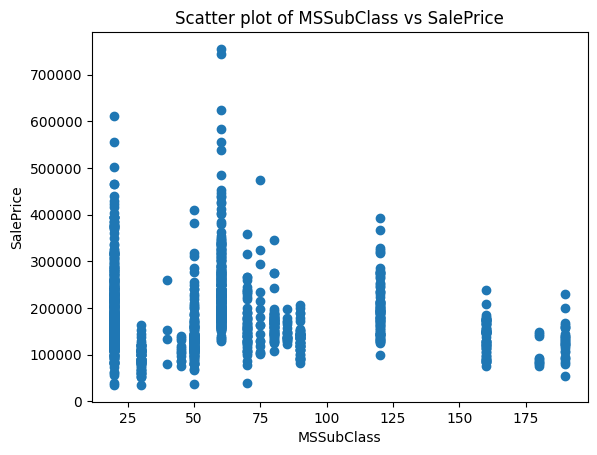

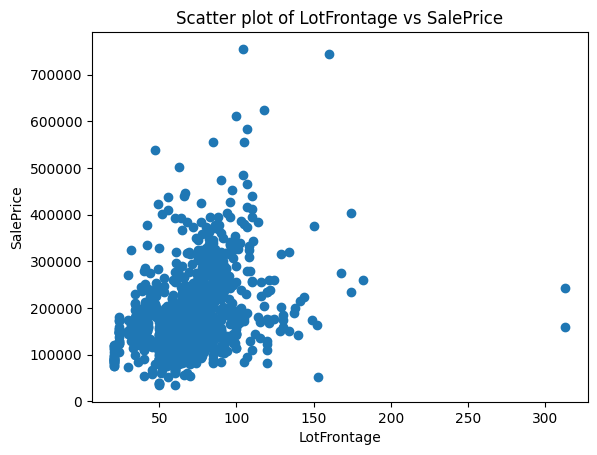

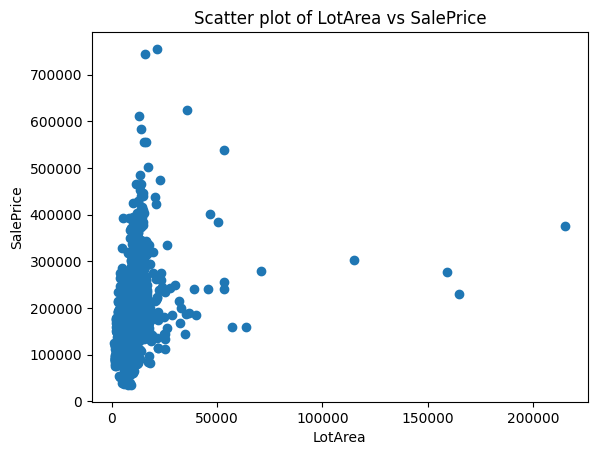

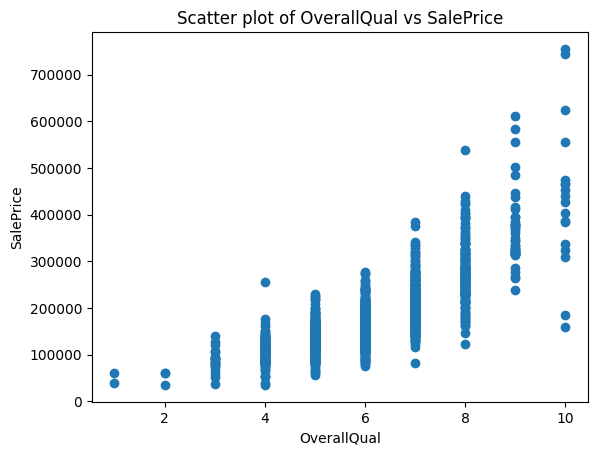

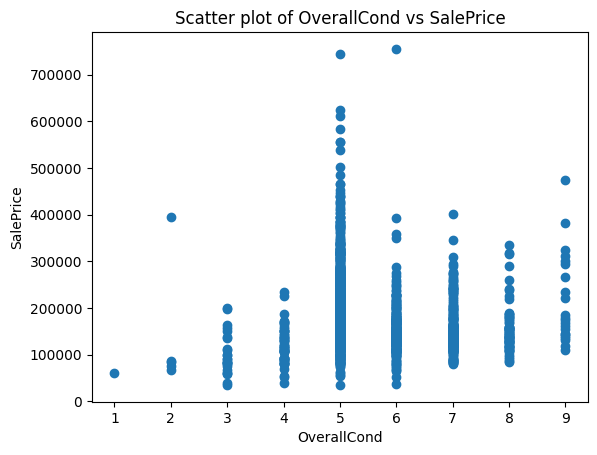

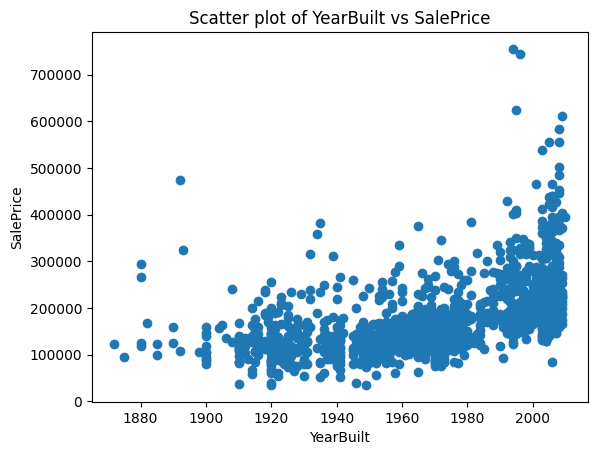

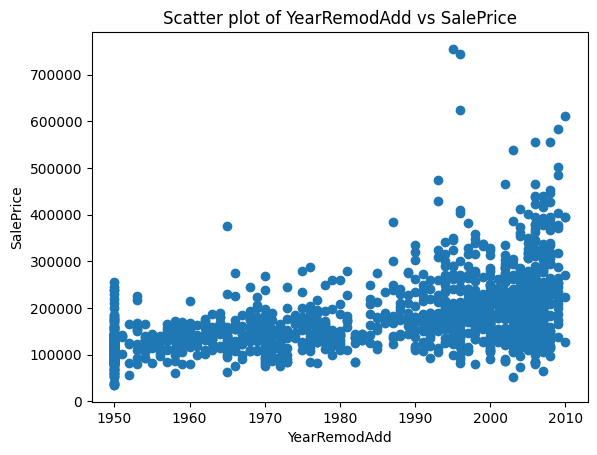

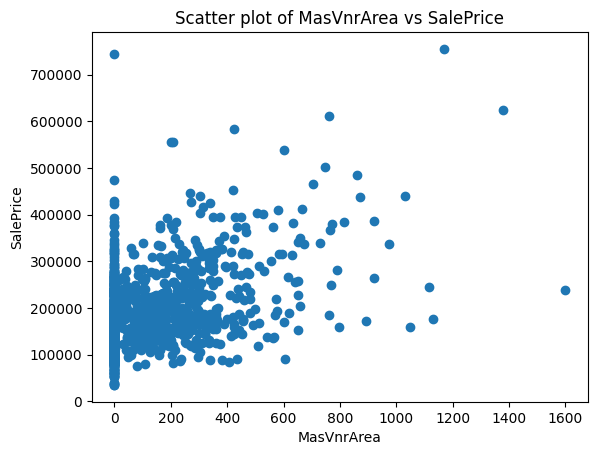

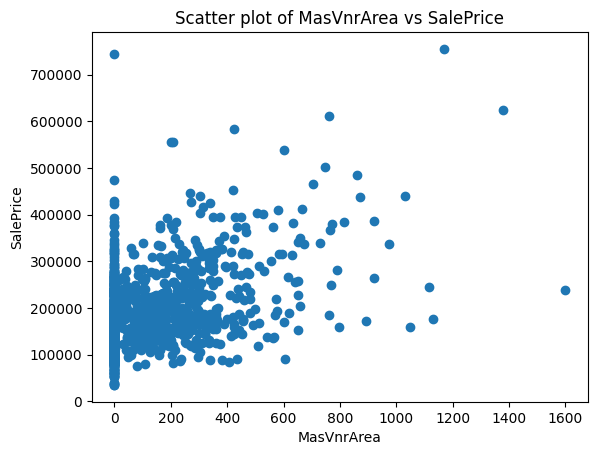

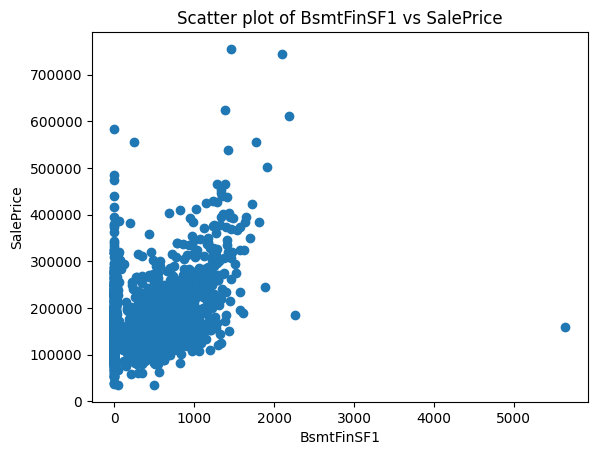

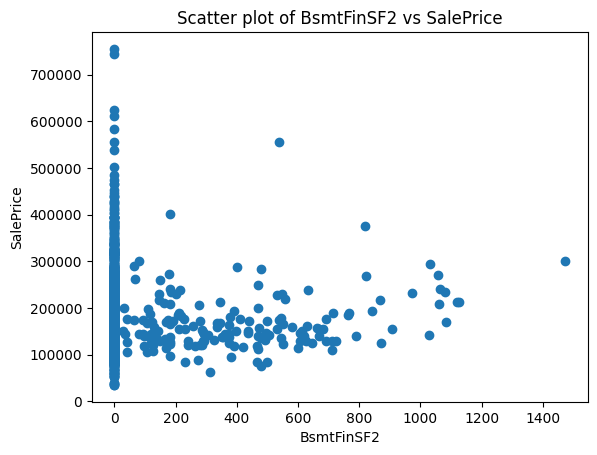

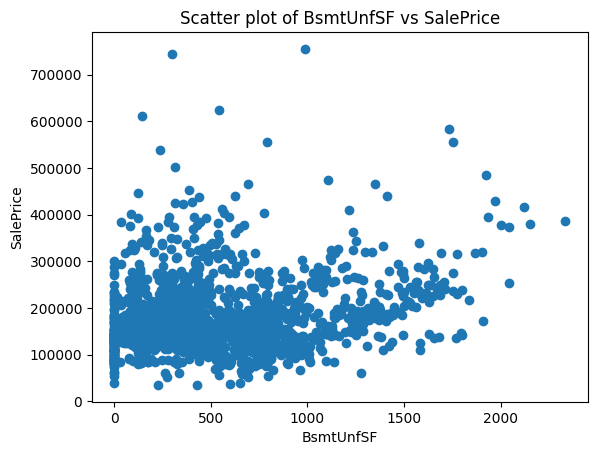

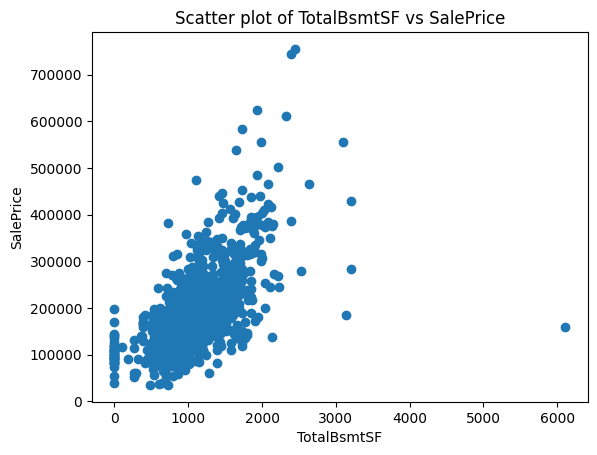

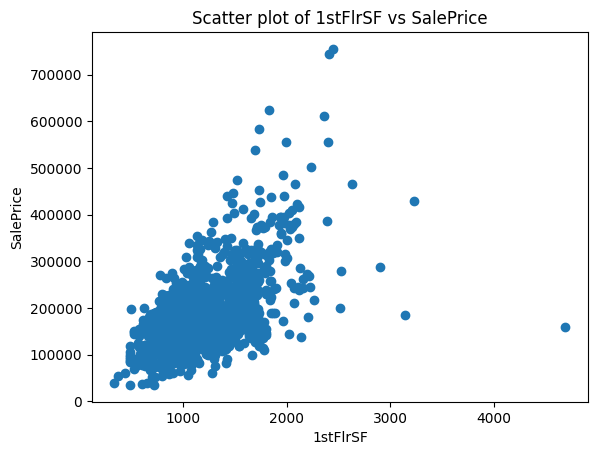

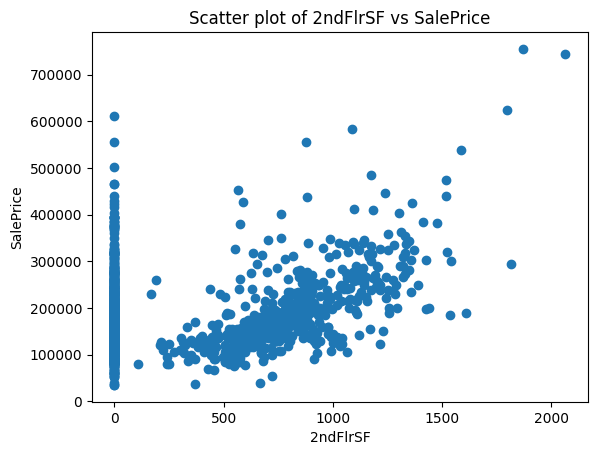

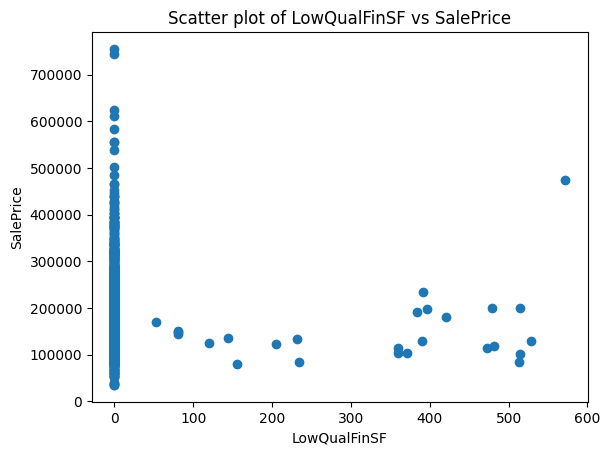

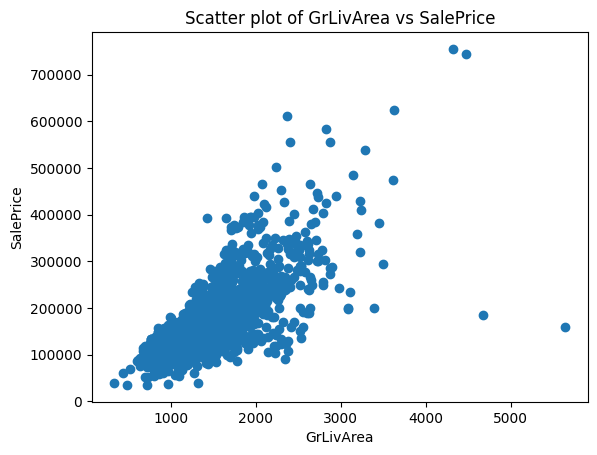

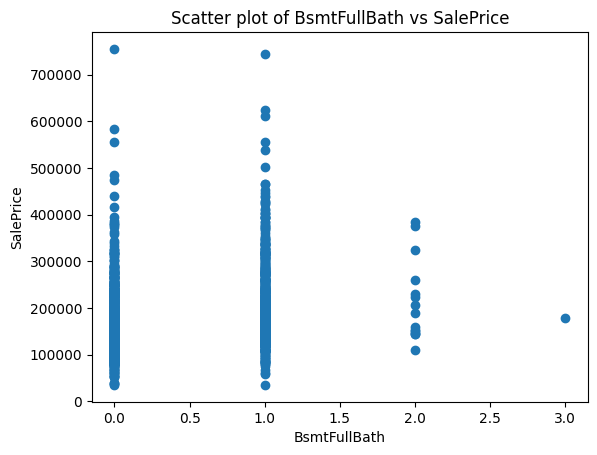

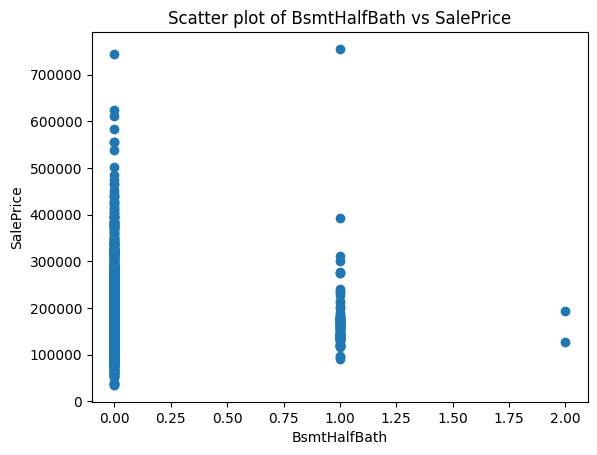

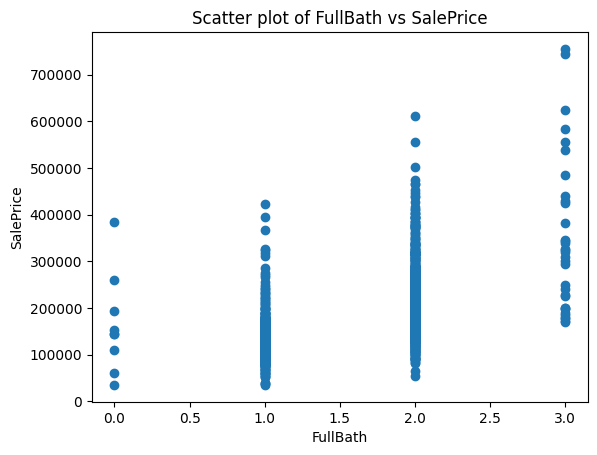

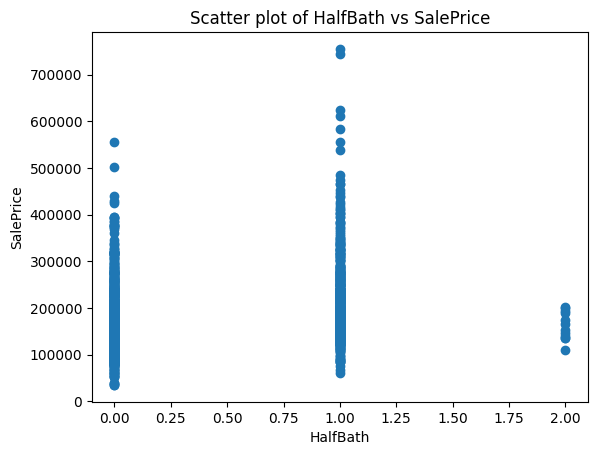

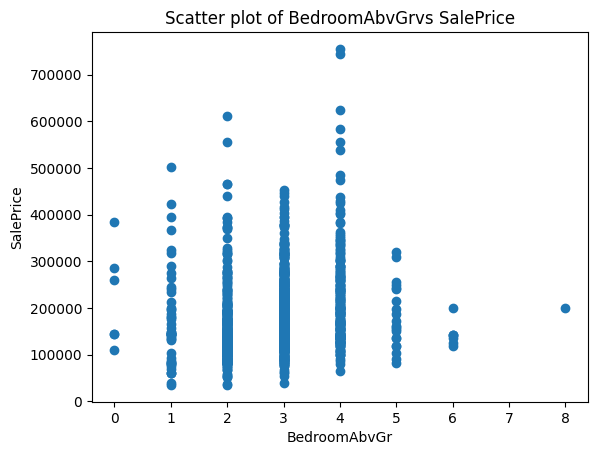

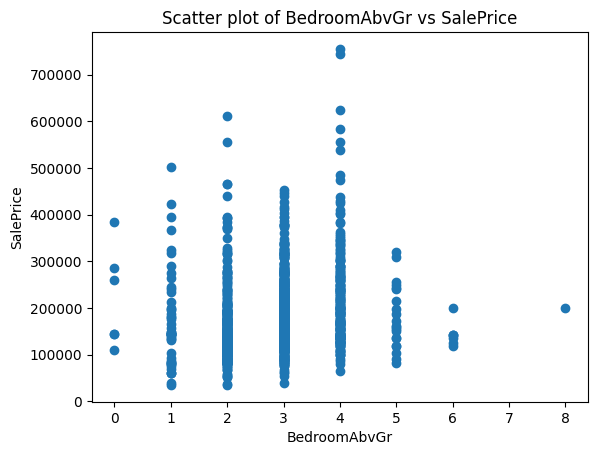

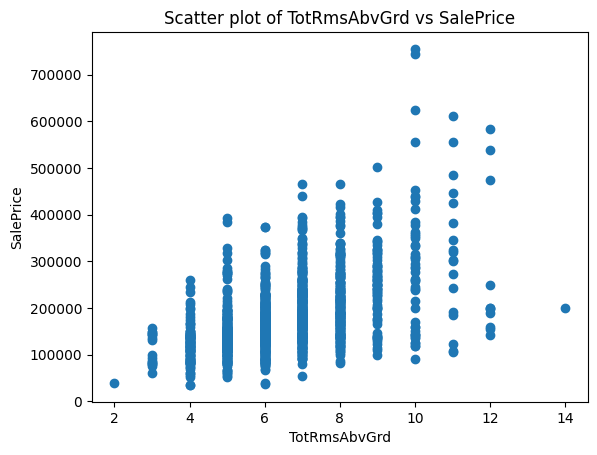

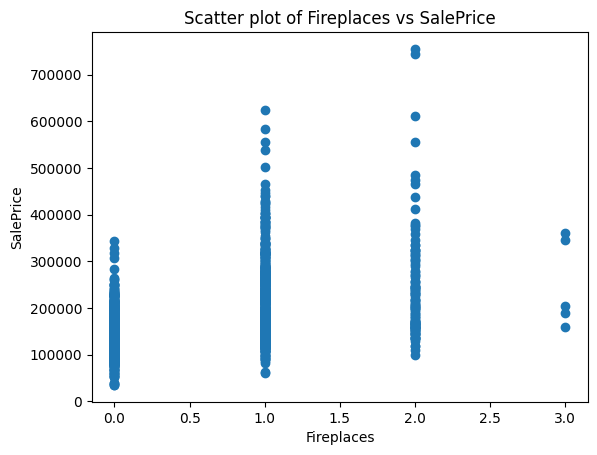

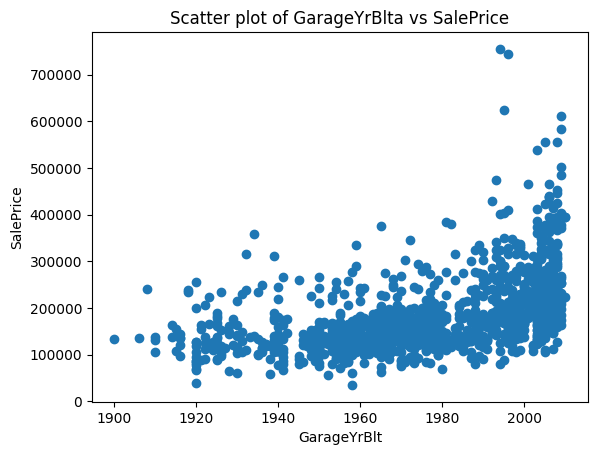

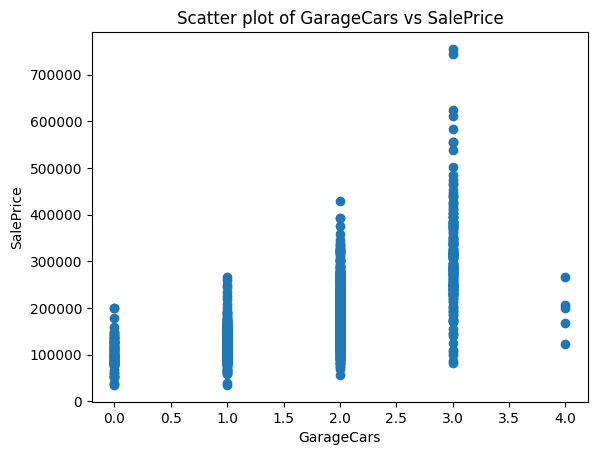

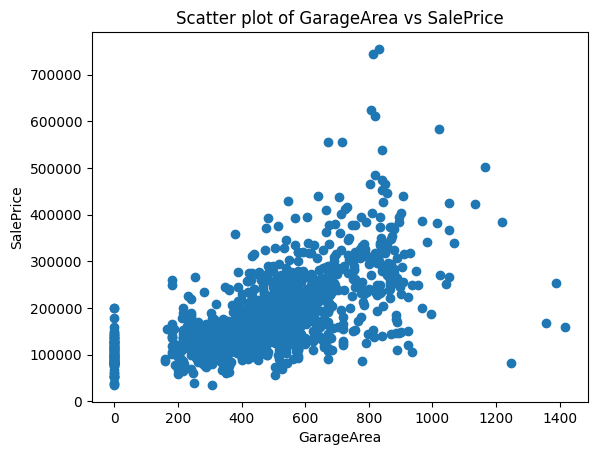

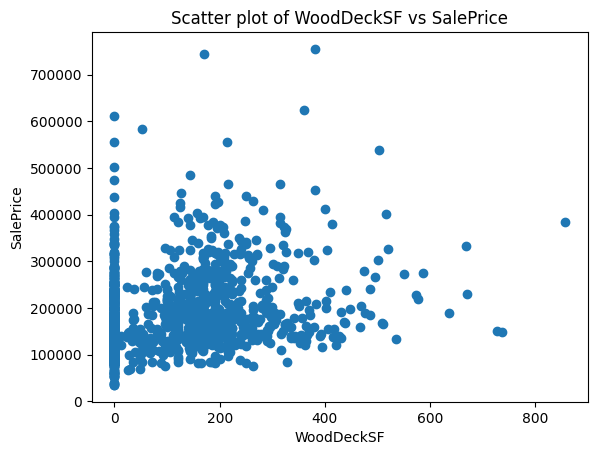

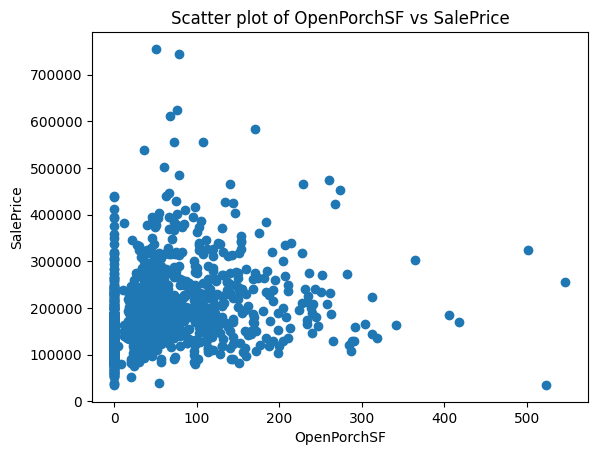

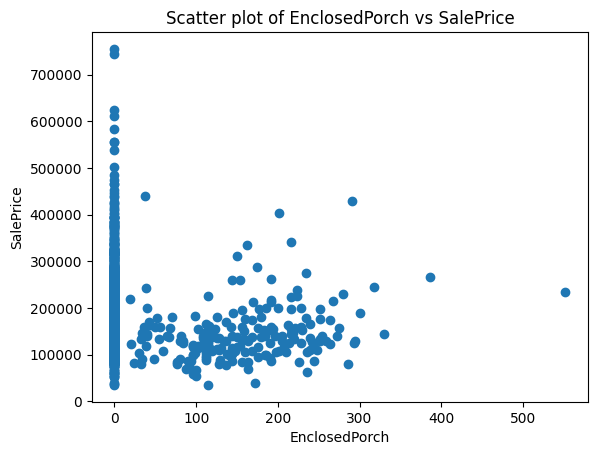

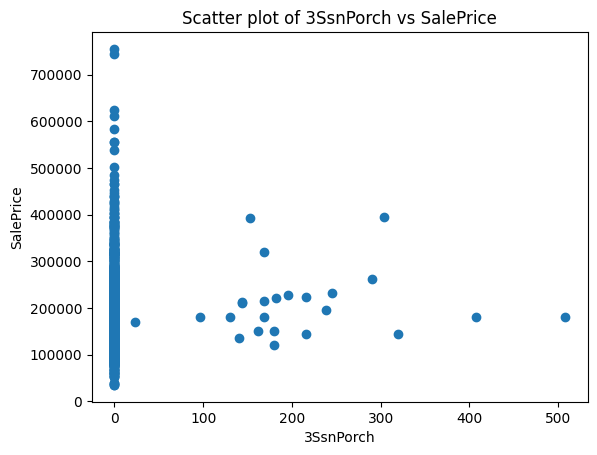

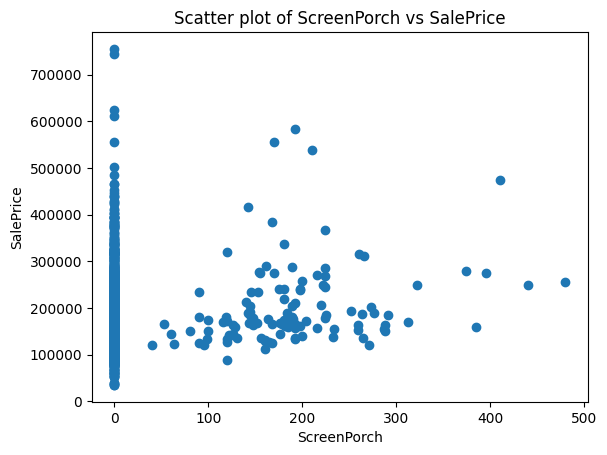

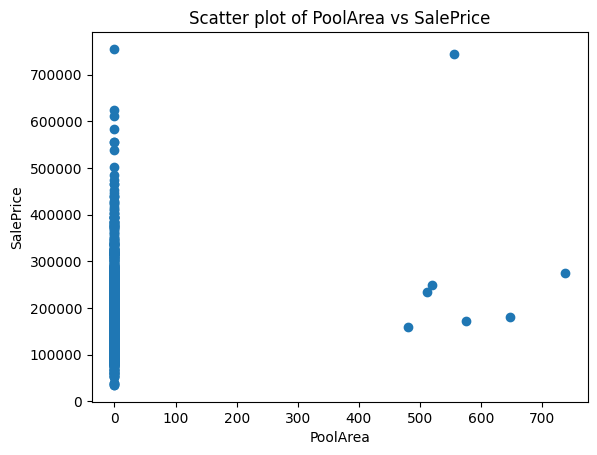

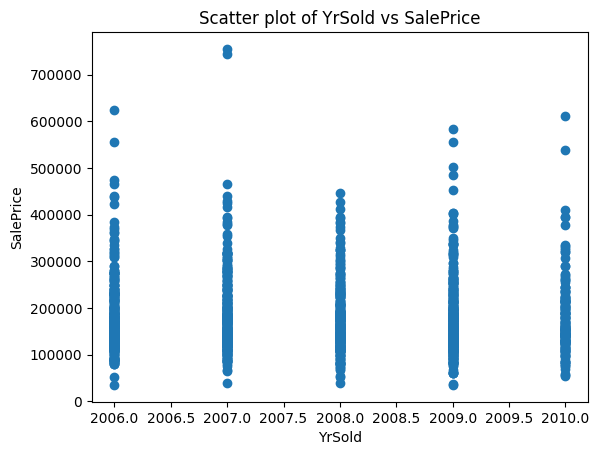

In [960]:
import matplotlib.pyplot as plt

# First
plt.figure() 
plt.scatter(x='MSSubClass', y='SalePrice', data=train)
plt.title('Scatter plot of MSSubClass vs SalePrice')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='LotFrontage', y='SalePrice', data=train)
plt.title('Scatter plot of LotFrontage vs SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='LotArea', y='SalePrice', data=train)
plt.title('Scatter plot of LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='OverallQual', y='SalePrice', data=train)
plt.title('Scatter plot of OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='OverallCond', y='SalePrice', data=train)
plt.title('Scatter plot of OverallCond vs SalePrice')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='YearBuilt', y='SalePrice', data=train)
plt.title('Scatter plot of YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train)
plt.title('Scatter plot of YearRemodAdd vs SalePrice')
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='MasVnrArea', y='SalePrice', data=train)
plt.title('Scatter plot of MasVnrArea vs SalePrice')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='MasVnrArea', y='SalePrice', data=train)
plt.title('Scatter plot of MasVnrArea vs SalePrice')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train)
plt.title('Scatter plot of BsmtFinSF1 vs SalePrice')
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train)
plt.title('Scatter plot of BsmtFinSF2 vs SalePrice')
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train)
plt.title('Scatter plot of BsmtUnfSF vs SalePrice')
plt.xlabel('BsmtUnfSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train)
plt.title('Scatter plot of TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='1stFlrSF', y='SalePrice', data=train)
plt.title('Scatter plot of 1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train)
plt.title('Scatter plot of 2ndFlrSF vs SalePrice')
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train)
plt.title('Scatter plot of LowQualFinSF vs SalePrice')
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='GrLivArea', y='SalePrice', data=train)
plt.title('Scatter plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train)
plt.title('Scatter plot of BsmtFullBath vs SalePrice')
plt.xlabel('BsmtFullBath')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train)
plt.title('Scatter plot of BsmtHalfBath vs SalePrice')
plt.xlabel('BsmtHalfBath')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='FullBath', y='SalePrice', data=train)
plt.title('Scatter plot of FullBath vs SalePrice')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='HalfBath', y='SalePrice', data=train)
plt.title('Scatter plot of HalfBath vs SalePrice')
plt.xlabel('HalfBath')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train)
plt.title('Scatter plot of BedroomAbvGrvs SalePrice')
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train)
plt.title('Scatter plot of BedroomAbvGr vs SalePrice')
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train)
plt.title('Scatter plot of TotRmsAbvGrd vs SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='Fireplaces', y='SalePrice', data=train)
plt.title('Scatter plot of Fireplaces vs SalePrice')
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train)
plt.title('Scatter plot of GarageYrBlta vs SalePrice')
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='GarageCars', y='SalePrice', data=train)
plt.title('Scatter plot of GarageCars vs SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='GarageArea', y='SalePrice', data=train)
plt.title('Scatter plot of GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train)
plt.title('Scatter plot of WoodDeckSF vs SalePrice')
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train)
plt.title('Scatter plot of OpenPorchSF vs SalePrice')
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train)
plt.title('Scatter plot of EnclosedPorch vs SalePrice')
plt.xlabel('EnclosedPorch')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='3SsnPorch', y='SalePrice', data=train)
plt.title('Scatter plot of 3SsnPorch vs SalePrice')
plt.xlabel('3SsnPorch')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='ScreenPorch', y='SalePrice', data=train)
plt.title('Scatter plot of ScreenPorch vs SalePrice')
plt.xlabel('ScreenPorch')
plt.ylabel('SalePrice')
plt.show()

plt.figure()  
plt.scatter(x='PoolArea', y='SalePrice', data=train)
plt.title('Scatter plot of PoolArea vs SalePrice')
plt.xlabel('PoolArea')
plt.ylabel('SalePrice')
plt.show()


plt.figure()  
plt.scatter(x='YrSold', y='SalePrice', data=train)
plt.title('Scatter plot of YrSold vs SalePrice')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

In [961]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
train.loc[train['LotFrontage'] > 300]
#id=935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [962]:
train.loc[train['LotArea'] > 55000]
#id= 250, 314, 336, 707, 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [963]:
train.loc[train['OverallQual'] == 10]
# id =524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [964]:
train.loc[train['OverallCond'] == 2]
#379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [965]:
train.loc[(train['OverallCond'] == 6) & (train['SalePrice'] > 700000)]
# id=692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [966]:
train.loc[(train['OverallCond'] == 5) & (train['SalePrice'] > 700000)]
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [967]:
train.loc[(train['YearBuilt'] <1900) & (train['SalePrice'] > 400000)]
#id=186


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [968]:
train.loc[(train['YearRemodAdd'] <1970) & (train['SalePrice'] > 300000)]
#id=314


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [969]:
train.loc[(train['MasVnrArea'] >1500)]
#id=298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [970]:
train.loc[(train['BsmtFinSF1'] >5000)]
#id =1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [971]:
train.loc[(train['BsmtFinSF2'] >1400)]
#id=323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [972]:
train.loc[(train['BsmtFinSF2'] >500) & (train['SalePrice'] >500000)]
#id =441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [973]:
train.loc[train['TotalBsmtSF'] >6000]
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [974]:
train.loc[train['1stFlrSF'] >4000]
#id=1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [975]:
train.loc[(train['LowQualFinSF'] >500) & (train['SalePrice'] >400000)]
#id =186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [976]:
train.loc[(train['GrLivArea'] >4000) & (train['SalePrice'] <400000)]
#id= 524,1299


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [977]:
train.loc[(train['BsmtFullBath'] ==3)]
#id=739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [978]:
train.loc[(train['BsmtHalfBath'] ==2)]
#id = 598 , 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [979]:
train.loc[(train['BedroomAbvGr'] ==8)]
#id =636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [980]:
train.loc[(train['KitchenAbvGr'] ==0)]
# id =955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [981]:
train.loc[(train['KitchenAbvGr'] ==3)]
#id= 49 , 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [982]:
train.loc[(train['TotRmsAbvGrd'] ==14)]
#id=636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [983]:
train.loc[(train['GarageArea'] >1200) & (train['SalePrice'] <300000)]
#id =1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [984]:
train.loc[(train['OpenPorchSF'] >500) & (train['SalePrice'] <100000)]
#id=496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [985]:
train.loc[(train['EnclosedPorch'] >500)]
#id=198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [986]:
## remove outliers
ids=[250, 314, 336, 707, 379, 1183,598, 935,1299,955, 636, 1062, 1191, 496,692,186,441,186,524,739,198,1338]

In [987]:
train = train[train.Id.isin(ids) == False]


Text(0.5, 1.0, 'Highest percentage of Nan values')

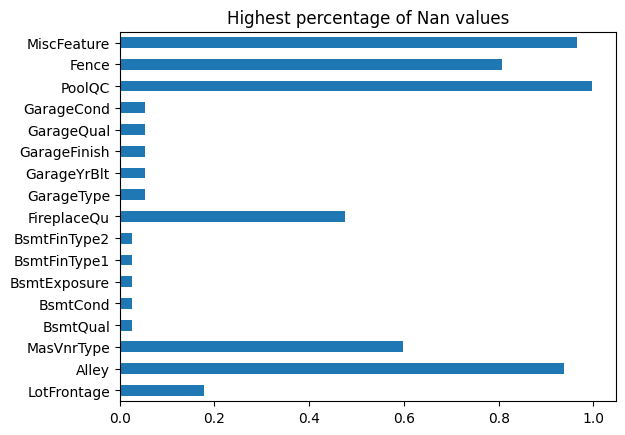

In [988]:
# find NaN values

nans = train.isna().sum() / train.shape[0]
nans[nans > 0.01].plot(kind = "barh")
plt.title("Highest percentage of Nan values")

In [989]:
#Fence, MiscFeature, poolQC, FireplaceQu, Alley, MasVnrType, Alley,LotFrontage

In [990]:
train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [991]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [992]:
train['Alley'].unique()
#fillna

array([nan, 'Grvl', 'Pave'], dtype=object)

In [993]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

In [994]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [995]:
train['Fence'].unique()
#fillna

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [996]:
train['MasVnrType'].unique()
#fillna

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [997]:
train['MasVnrArea'].unique()
#fillna

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [998]:
train['FireplaceQu'].unique()
#fillna

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [999]:
train['GarageYrBlt'].unique()


array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       1927., 1918., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 2010., 1946., 1908., 1929., 1933.])

In [1000]:
train['GarageCond'].unique()
#fillna

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [1001]:
train['GarageType'].unique()


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [1002]:
train['GarageArea'].unique()


array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  856,  473,  398,  500,  349,  454,  644,  299,  210,
        431,  438,  675,  968,  721,  336,  810,  494,  457,  818,  463,
        604,  538,  520,  309,  429,  673,  884,  8

In [1003]:
train['MasVnrType'] = train['MasVnrType'].fillna('No')
test['MasVnrType'] = test['MasVnrType'].fillna('No')

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

train['FireplaceQu'] = train['FireplaceQu'].fillna('No')
test['FireplaceQu'] = test['FireplaceQu'].fillna('No')

train['LotFrontage'] = train['LotFrontage'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(0)

train['GarageType'] = train['GarageType'].fillna('No')
test['GarageType'] = test['GarageType'].fillna('No')

train['GarageFinish'] = train['GarageFinish'].fillna('No')
test['GarageFinish'] = test['GarageFinish'].fillna('No')

train['GarageQual'] = train['GarageQual'].fillna('No')
test['GarageQual'] = test['GarageQual'].fillna('No')

train['BsmtExposure'] = train['BsmtExposure'].fillna('No')
test['BsmtExposure'] = test['BsmtExposure'].fillna('No')

train['BsmtQual'] = train['BsmtQual'].fillna('No')
test['BsmtQual'] = test['BsmtQual'].fillna('No')

train['BsmtCond'] = train['BsmtCond'].fillna('No')
test['BsmtCond'] = test['BsmtCond'].fillna('No')

train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Unf')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('Unf')

train['Electrical'] = train['Electrical'].fillna('SBrkr')
test['Electrical'] = test['Electrical'].fillna('SBrkr')


In [1004]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1005]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2']

train= train.drop(columns=columns_to_drop)
test= test.drop(columns=columns_to_drop)


# Feature Engineering

In [1006]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1439 non-null   int64  
 1   MSSubClass     1439 non-null   int64  
 2   MSZoning       1439 non-null   object 
 3   LotFrontage    1439 non-null   float64
 4   LotArea        1439 non-null   int64  
 5   Street         1439 non-null   object 
 6   LotShape       1439 non-null   object 
 7   LandContour    1439 non-null   object 
 8   Utilities      1439 non-null   object 
 9   LotConfig      1439 non-null   object 
 10  LandSlope      1439 non-null   object 
 11  Neighborhood   1439 non-null   object 
 12  Condition1     1439 non-null   object 
 13  Condition2     1439 non-null   object 
 14  BldgType       1439 non-null   object 
 15  HouseStyle     1439 non-null   object 
 16  OverallQual    1439 non-null   int64  
 17  OverallCond    1439 non-null   int64  
 18  YearBuilt    

In [1007]:
#total square footage of house
train['totalSquare'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['totalSquare'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']
train = train.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2'])
test= test.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2'])


In [1008]:
#total area of house
train['totalarea'] =train['TotalBsmtSF']+train['GrLivArea']
test['totalarea'] = test['TotalBsmtSF']+test['GrLivArea'] 
train = train.drop(columns=['TotalBsmtSF','GrLivArea'])
test = test.drop(columns=['TotalBsmtSF','GrLivArea'])


In [1009]:
#remodelage 
train['remodelage'] = train['YrSold'] - train['YearRemodAdd']
test['remodelage'] = test['YrSold'] - test['YearRemodAdd']

In [1010]:
#Years from being built to being sold
train['ageOfHouse'] = train['YrSold'] - train['YearBuilt']
test['ageOfHouse'] = test['YrSold'] - test['YearBuilt']
train = train.drop(columns=['YrSold','YearBuilt','YearRemodAdd'])
test = test.drop(columns=['YrSold','YearBuilt','YearRemodAdd'])

In [1011]:
#total bath 
train['bathCount'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['BsmtHalfBath'] + train['HalfBath']) 
test['bathCount'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['BsmtHalfBath'] + test['HalfBath'])
train = train.drop(columns=['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'])
test = test.drop(columns=['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'])


In [1012]:
#total porchsf
train['porchsf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
test['porchsf'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF']
train = train.drop(columns=['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'])
test = test.drop(columns=['OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'])


<Axes: >

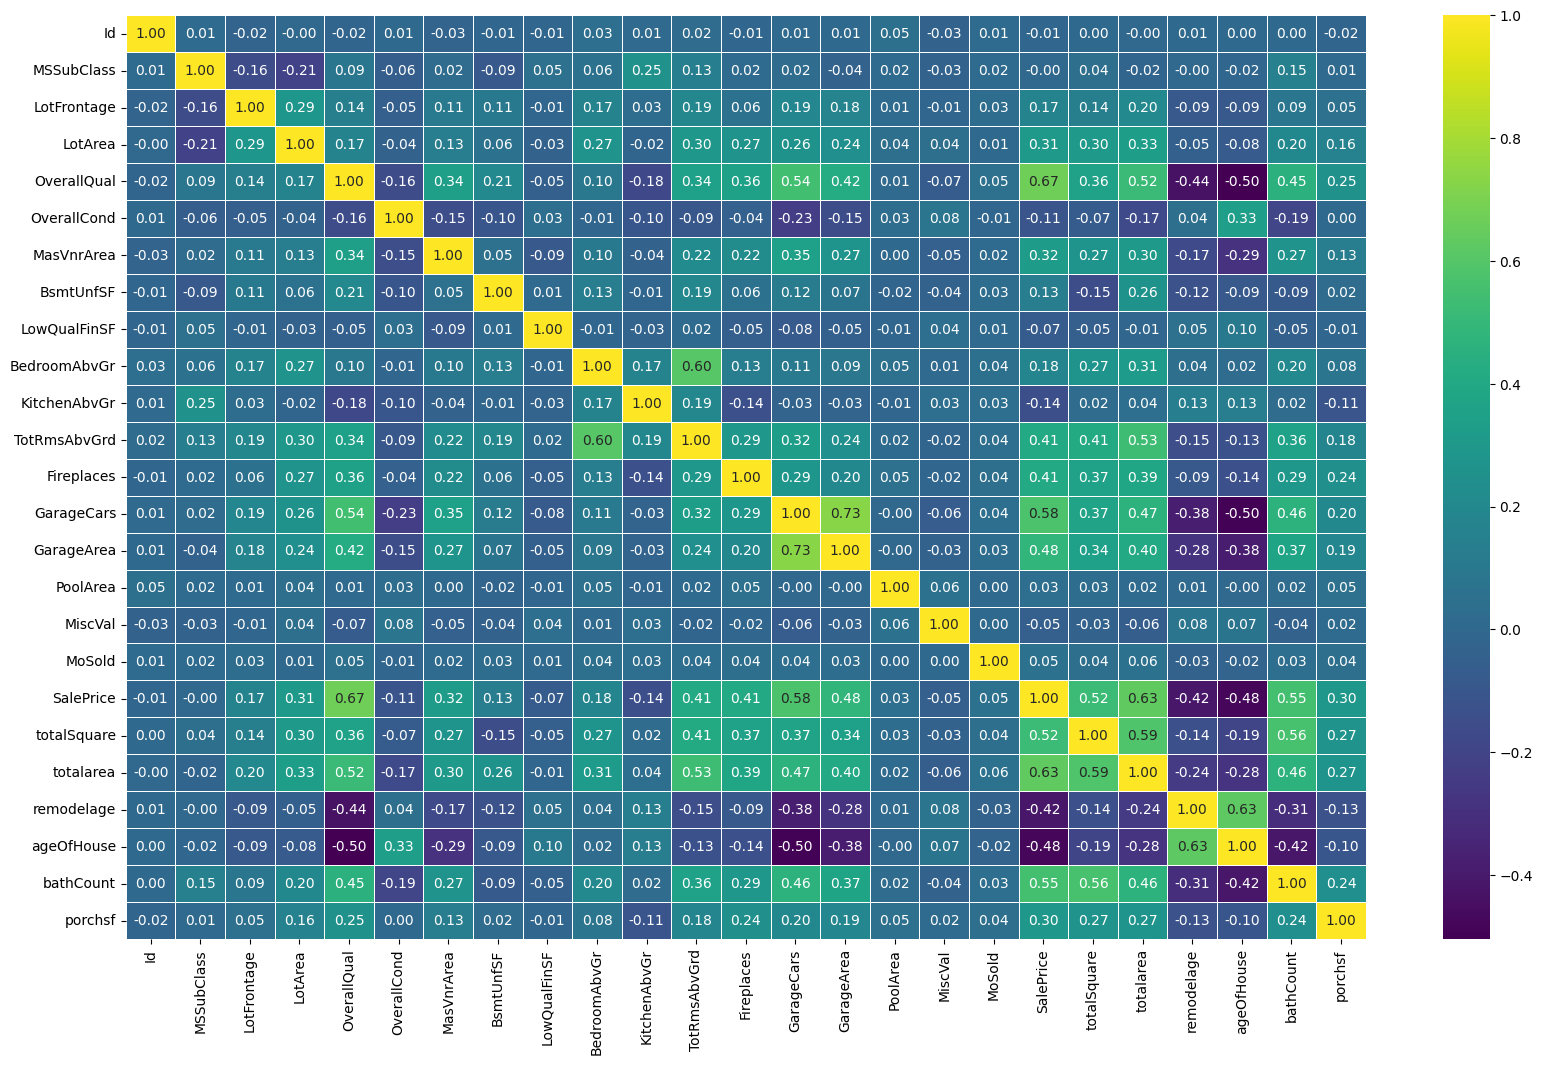

In [1013]:
import seaborn as sns

# Compute Kendall correlation matrix
kendall_correlation_matrix = train.corr(method='kendall', numeric_only=True)

# Visualize the Kendall correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)


In [1014]:
#Remove features with high correlation
train = train.drop(columns=['GarageArea'])
test= test.drop(columns=['GarageArea'])

In [1015]:
# dealing with categorical features
train.dtypes[train.dtypes=='object']


MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [1016]:
#numerical values
train.dtypes[train.dtypes !='object']


Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
OverallQual       int64
OverallCond       int64
MasVnrArea      float64
BsmtUnfSF         int64
LowQualFinSF      int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
PoolArea          int64
MiscVal           int64
MoSold            int64
SalePrice         int64
totalSquare       int64
totalarea         int64
remodelage        int64
ageOfHouse        int64
bathCount       float64
porchsf           int64
dtype: object

In [1017]:
train['SalePrice'] = np.log1p(train['SalePrice'])

#too many unique values
train = train.drop(columns=['Id'])
test = test.drop(columns=['Id'])

numerical=train.select_dtypes(include=['int64', 'float64']).columns
numerical=numerical.drop('SalePrice')


In [1018]:
ordinalEn=['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', 
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond'];

In [1019]:
hotEn=['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [1020]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


numeric_pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='mean')),  # Handle missing data by replacing NaNs with the column mean
    ('standardization', StandardScaler())           # Scale the features to have a mean of 0 and std of 1
])

ordinalEn_pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='most_frequent')),  # Impute missing values using the most frequent value in each column
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode categorical variables as ordinal values
])
hotEn_pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='most_frequent')),  # Impute missing values using the most frequent value in each column
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Apply one-hot encoding to categorical variables
])




In [1021]:
from sklearn.compose import ColumnTransformer  

col_transformer = ColumnTransformer(transformers=[
    ('numeric_pipeline', numeric_pipeline, numerical), 
    ('ordinal_encoder_pipeline', ordinalEn_pipeline, ordinalEn), 
    ('one_hot_encoder_pipeline', hotEn_pipeline, hotEn)], 
remainder='passthrough', 
n_jobs=-1)



In [1022]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_transformer)
])

In [1023]:

y= train['SalePrice']


In [1024]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,SaleType,SaleCondition,SalePrice,totalSquare,totalarea,remodelage,ageOfHouse,bathCount,porchsf
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,WD,Normal,12.247699,2416,2566,5,5,3.5,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,WD,Normal,12.109016,2240,2524,31,31,2.5,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,WD,Normal,12.317171,2272,2706,6,7,3.5,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,WD,Abnorml,11.849405,1933,2473,36,91,2.0,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,WD,Normal,12.429220,2853,3343,8,8,3.5,276


In [1025]:
x=train.drop('SalePrice', axis=1)

In [1026]:

test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,SaleType,SaleCondition,totalSquare,totalarea,remodelage,ageOfHouse,bathCount,porchsf
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,WD,Normal,1508.0,1778.0,49,49,1.0,260
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,12500,6,WD,Normal,2252.0,2658.0,52,52,1.5,429
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,3,WD,Normal,2420.0,2557.0,12,13,2.5,246
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,6,WD,Normal,2206.0,2530.0,12,12,2.5,396
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,1,WD,Normal,1543.0,2560.0,18,18,2.0,226


In [1027]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,SaleType,SaleCondition,totalSquare,totalarea,remodelage,ageOfHouse,bathCount,porchsf
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,WD,Normal,1508.0,1778.0,49,49,1.0,260
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,12500,6,WD,Normal,2252.0,2658.0,52,52,1.5,429
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,3,WD,Normal,2420.0,2557.0,12,13,2.5,246
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,6,WD,Normal,2206.0,2530.0,12,12,2.5,396
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,1,WD,Normal,1543.0,2560.0,18,18,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,WD,Normal,1092.0,1638.0,36,36,1.5,0
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,4,WD,Abnorml,1344.0,1638.0,36,36,1.5,24
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,9,WD,Abnorml,2448.0,2448.0,10,46,2.0,474
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,700,7,WD,Normal,1307.0,1882.0,14,14,1.5,112


In [1061]:
# Assuming x_test has the same column names and types as x_train
x_test_preprocessed = col_transformer.transform(test)


In [1029]:

x_preprocessed=pipeline.fit_transform(x)


In [1030]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

# Training

# sklearn LinearRegression

In [1031]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()


Mean Squared Error: 3.112482149969423e+18
R^2 Score: -2.255266141862415e+19 

Underfitting: The combination of a high MSE and a negative R² score suggests that your model is likely underfitting:
It is too simple to effectively model the relationship between the input features and the target variable.
The model fails to capture important patterns or complexities in the data.
 

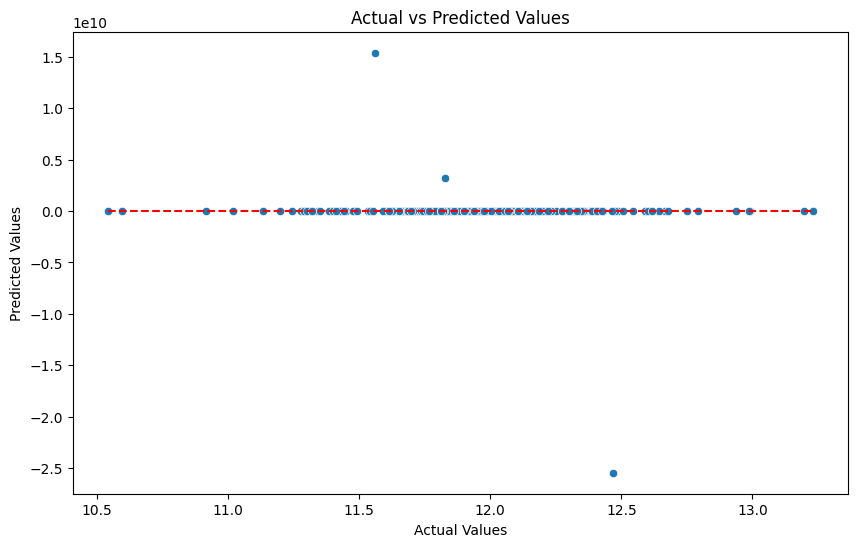

In [1032]:
plt.figure(figsize=(10, 6))
y_pred = model.predict(X_test)
# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

In [1033]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 3.112482149969423e+18
R² Score: -2.255266141862415e+19


Test Mean Squared Error: 0.016745689924204308
Test R² Score: 0.8786627980868723
Training Mean Squared Error: 0.008822662790823912
Training R² Score: 0.9423555338043916
Coefficients: [-2.93282933e-03  5.08284641e-03  2.33423664e-02  5.74746141e-02
  3.13567582e-02  1.09537457e-02  7.59504349e-03 -3.37641740e-04
  1.28700623e-03 -6.38932632e-03  1.88953899e-02  1.84013451e-02
  3.09348448e-02  6.49497290e-03  4.01222676e-04 -3.39112567e-04
  5.81664094e-02  5.88070703e-02 -1.92275068e-02 -2.74340467e-02
  2.10088622e-02  1.91409058e-02 -1.42384814e-03 -3.09785399e-03
 -4.66866560e-03 -3.50706626e-03 -1.47655933e-02 -3.87986659e-03
  1.23027089e-02  1.37439247e-02  1.18527219e-04 -5.49857285e-03
  7.88514362e-03  7.70586828e-03  4.32051890e-03 -1.01199946e-02
 -3.95670884e-03 -1.07037261e-02 -1.10636733e-02  6.23331146e-03
 -2.72871665e-03  2.72871665e-03  1.18637046e-03  9.09050999e-03
 -6.91952211e-03 -3.41820804e-03 -2.72367499e-03  2.03703062e-03
 -2.50072442e-03 -6.14260401e-03  3.91

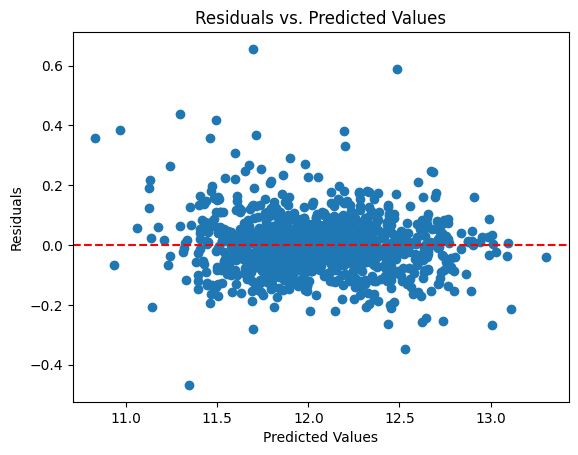

Mean CV MSE Scores: [1.43263703e-02 1.45043736e+02 1.43263146e-02 1.45043735e+02
 1.43258839e-02 1.45043728e+02 1.43225776e-02 1.45043673e+02
 1.42985570e-02 1.45043271e+02 1.41715067e-02 1.45040970e+02
 1.38083193e-02 1.45035395e+02 1.33124840e-02 1.45033836e+02
 1.73100153e-02 1.45040284e+02 5.22859968e-02 1.45076508e+02]


In [1034]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: scaling
    ('ridge', Ridge())
])

# Set up the hyperparameter grid
param_grid = {
    'ridge__alpha': np.logspace(-4, 4, 10),
    'ridge__fit_intercept': [True, False]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test R² Score: {r2}')

# Evaluate on training set
y_train_pred = grid_search.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R² Score: {train_r2}')

# Feature importance analysis
ridge_model = grid_search.best_estimator_.named_steps['ridge']

print("Coefficients:", ridge_model.coef_)

# Residual analysis
plt.scatter(y_train_pred, y_train_pred - y_train)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Cross-validation results
cv_results = grid_search.cv_results_
print("Mean CV MSE Scores:", -cv_results['mean_test_score'])

The model shows signs of slight overfitting since the training metrics are better than test metrics, but the gap isn't concerning. The difference between training and test R² is about 5%, which is acceptable.

In [1035]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'ridge__alpha': 166.81005372000558, 'ridge__fit_intercept': True}
Best cross-validation score: -0.0133


In [1036]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('rank_test_score')

In [1037]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ridge__alpha', 'param_ridge__fit_intercept', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [1038]:
best_pipeline = grid_search.best_estimator_

In [1039]:
!pip install dagshub

In [1040]:
import dagshub

In [1041]:
import dagshub
dagshub.init(repo_owner='TamariToradze', repo_name='ML_Advanced-Regression-Techniques', mlflow=True)

Initialized MLflow to track repo "TamariToradze/ML_Advanced-Regression-Techniques"

Repository TamariToradze/ML_Advanced-Regression-Techniques initialized!

In [1042]:
!pip install mlflow

# Linear Regression Model

In [1043]:
import pandas as pd
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from scipy import stats

mlflow.set_experiment("Linear Regression Model")


active_run = mlflow.active_run()
if active_run is not None:
    mlflow.end_run()
with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    aic = n * np.log(mse) + 2 * k
    bic = n * np.log(mse) + k * np.log(n)
    train_r2 = r2_score(y_train, y_train_pred)
    n_train = len(y_train)
    f_stat = (train_r2 / k) / ((1 - train_r2) / (n_train - k - 1))
    f_p_value = 1 - stats.f.cdf(f_stat, k, n_train - k - 1)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R²", r2)
    mlflow.log_metric("Adjusted R²", adj_r2)
    mlflow.log_metric("AIC", aic)
    mlflow.log_metric("BIC", bic)
    mlflow.log_metric("F-statistic", f_stat)
    mlflow.log_metric("F-p-value", f_p_value)
    mlflow.sklearn.log_model(model, "linear_regression_model")
    print(f"📈 Model Performance:")
    print(f"R²: {r2:.4f} | Adjusted R²: {adj_r2:.4f}")
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | MSE: {mse:.4f}")
    print(f"AIC: {aic:.2f} | BIC: {bic:.2f}")
    print(f"F-statistic: {f_stat:.4f} | p-value: {f_p_value:.4e}")


mlflow.set_tag("Model", "Linear Regression")


2025/04/09 16:30:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


📈 Model Performance:
R²: -22552661418624151552.0000 | Adjusted R²: -69597998141345505280.0000
MAE: 153181373.8238 | RMSE: 1764222817.5515 | MSE: 3112482149969422848.0000
AIC: 12651.60 | BIC: 13362.22
F-statistic: 86.5811 | p-value: 1.1102e-16
🏃 View run inquisitive-ant-369 at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/5/runs/9475a166a1434bc8a2648d7ffead70d7
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/5


# Ridgo Lasso 


In [1044]:
#ridgo lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                           f1_score)
import scipy.stats as stats

active_run = mlflow.active_run()
if active_run is not None:
    mlflow.end_run()
def calculate_adjusted_r2(r2, n, p):
    """Calculate adjusted R-squared
    n: number of samples
    p: number of predictors
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def log_residual_plots(y_true, y_pred, model_name):
    """Create and log various residual plots"""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_pred - y_true)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residuals vs. Predicted Values")
    plt.axhline(0, color='red', linestyle='--')
    plt.savefig("residuals_vs_predicted.png")
    plt.close()
    mlflow.log_artifact("residuals_vs_predicted.png")
    plt.figure(figsize=(10, 6))
    stats.probplot(y_pred - y_true, dist="norm", plot=plt)
    plt.title(f"{model_name}: Q-Q Plot of Residuals")
    plt.savefig("qq_plot.png")
    plt.close()
    mlflow.log_artifact("qq_plot.png")
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred - y_true, bins=30)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"{model_name}: Histogram of Residuals")
    plt.savefig("residuals_histogram.png")
    plt.close()
    mlflow.log_artifact("residuals_histogram.png")

def run_regression_experiment(model_type="ridge"):
    mlflow.set_experiment(f"{model_type.capitalize()}_Regression_Experiment2")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_type, Ridge() if model_type == "ridge" else Lasso())
    ])
    param_grid = {
        f'{model_type}__alpha': np.logspace(-4, 4, 10),
        f'{model_type}__fit_intercept': [True, False]
    }
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                             scoring='neg_mean_squared_error', cv=5)

    with mlflow.start_run(run_name=f"{model_type}_regression_grid_search") as mlflow_run:
        run_id = mlflow_run.info.run_id
        print(f"Run ID: {run_id}")
        grid_search.fit(X_train, y_train)
        mlflow.log_params(grid_search.best_params_)
        y_pred = grid_search.predict(X_test)
        y_train_pred = grid_search.predict(X_train)
        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_pred)
        test_mae = mean_absolute_error(y_test, y_pred)
        test_adj_r2 = calculate_adjusted_r2(test_r2, len(y_test), X_test.shape[1])
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_adj_r2 = calculate_adjusted_r2(train_r2, len(y_train), X_train.shape[1])
        n = len(y_test)
        p = X_test.shape[1]
        f_stat = (test_r2 / p) / ((1 - test_r2) / (n - p - 1))
        f_p_value = 1 - stats.f.cdf(f_stat, p, n - p - 1)
        metrics = {
            "test_mse": test_mse,
            "test_rmse": test_rmse,
            "test_r2": test_r2,
            "test_adj_r2": test_adj_r2,
            "test_mae": test_mae,
            "train_mse": train_mse,
            "train_rmse": train_rmse,
            "train_r2": train_r2,
            "train_adj_r2": train_adj_r2,
            "train_mae": train_mae,
            "f_statistic": f_stat,
            "f_p_value": f_p_value
        }
        mlflow.log_metrics(metrics)
        cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
        mlflow.log_metric("cv_mean_score", cv_scores.mean())
        mlflow.log_metric("cv_std_score", cv_scores.std())
        model = grid_search.best_estimator_.named_steps[model_type]
        mlflow.log_param("coefficients", model.coef_.tolist())
        log_residual_plots(y_test, y_pred, model_type.capitalize())
        mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
        print(f"\n{model_type.capitalize()} Regression Results:")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Test Adjusted R²: {test_adj_r2:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"F-statistic: {f_stat:.4f} (p-value: {f_p_value:.4f})")
        print(f"Cross-validation mean score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Run experiments for both Ridge and Lasso
run_regression_experiment("Ridge")
run_regression_experiment("Lasso")

🏃 View run blushing-gull-453 at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/5/runs/4bf9acee553546a4aa7b3ccc33129f7c
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/5
Run ID: 264fea8e47b7472393fa57fb98a39f2d


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e-02, tolerance: 1.423e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e-02, tolerance: 1.394e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.792e+01, tolerance: 1.335e


Ridge Regression Results:
Best parameters: {'Ridge__alpha': 0.005994842503189409, 'Ridge__fit_intercept': True}
Test RMSE: 0.1251
Test R²: 0.8866
Test Adjusted R²: 0.6501
Test MAE: 0.0808
F-statistic: 3.7491 (p-value: 0.0000)
Cross-validation mean score: 0.9156 (±0.0136)
🏃 View run Ridge_regression_grid_search at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/6/runs/264fea8e47b7472393fa57fb98a39f2d
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/6
Run ID: f50bf6e9891d4e63aea63bec031ce405


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e-02, tolerance: 1.423e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e-02, tolerance: 1.394e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.792e+01, tolerance: 1.335e


Lasso Regression Results:
Best parameters: {'Lasso__alpha': 0.005994842503189409, 'Lasso__fit_intercept': True}
Test RMSE: 0.1251
Test R²: 0.8866
Test Adjusted R²: 0.6501
Test MAE: 0.0808
F-statistic: 3.7491 (p-value: 0.0000)
Cross-validation mean score: 0.9156 (±0.0136)
🏃 View run Lasso_regression_grid_search at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/7/runs/f50bf6e9891d4e63aea63bec031ce405
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/7


# Polynomial Regression Experiment

In [1045]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats as stats

active_run = mlflow.active_run()
if active_run is not None:
    mlflow.end_run()
    
def calculate_adjusted_r2(r2, n, p):
    """Calculate adjusted R-squared"""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def log_residual_plots(y_true, y_pred, degree):
    """Create and log various residual plots"""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_pred - y_true)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Polynomial Regression (degree={degree}): Residuals vs. Predicted Values")
    plt.axhline(0, color='red', linestyle='--')
    plt.savefig("residuals_vs_predicted.png")
    plt.close()
    mlflow.log_artifact("residuals_vs_predicted.png")
    plt.figure(figsize=(10, 6))
    stats.probplot(y_pred - y_true, dist="norm", plot=plt)
    plt.title(f"Polynomial Regression (degree={degree}): Q-Q Plot of Residuals")
    plt.savefig("qq_plot.png")
    plt.close()
    mlflow.log_artifact("qq_plot.png")
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred - y_true, bins=30)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Polynomial Regression (degree={degree}): Histogram of Residuals")
    plt.savefig("residuals_histogram.png")
    plt.close()
    mlflow.log_artifact("residuals_histogram.png")

def plot_polynomial_fit(X, y, model, degree):
    """Plot the polynomial fit"""
    plt.figure(figsize=(10, 6))
    sort_idx = X.flatten().argsort()
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx] 
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
    plt.plot(X_sorted, model.predict(X_sorted.reshape(-1, 1)), color='red', label='Polynomial fit')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression Fit (degree={degree})")
    plt.legend()
    plt.savefig("polynomial_fit.png")
    plt.close()
    mlflow.log_artifact("polynomial_fit.png")

def run_polynomial_regression_experiment():
    mlflow.set_experiment("Polynomial_Regression_experiment")
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures()),
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    param_grid = {
        'poly_features__degree': range(1, 3),
        'regression__fit_intercept': [True, False]
    }
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                             scoring='neg_mean_squared_error', cv=5)

    with mlflow.start_run(run_name="polynomial_regression_grid_search") as mlflow_run:
        run_id = mlflow_run.info.run_id
        print(f"Run ID: {run_id}")
        
        grid_search.fit(X_train, y_train)
        mlflow.log_params(grid_search.best_params_)
        y_pred = grid_search.predict(X_test)
        y_train_pred = grid_search.predict(X_train)
        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_pred)
        test_mae = mean_absolute_error(y_test, y_pred)
        best_degree = grid_search.best_params_['poly_features__degree']
        fit_intercept = grid_search.best_params_['regression__fit_intercept']
        p = best_degree + (1 if fit_intercept else 0)
        
        test_adj_r2 = calculate_adjusted_r2(test_r2, len(y_test), p)

        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_adj_r2 = calculate_adjusted_r2(train_r2, len(y_train), p)
        n = len(y_test)
        f_stat = (test_r2 / p) / ((1 - test_r2) / (n - p - 1))
        f_p_value = 1 - stats.f.cdf(f_stat, p, n - p - 1)
        aic = n * np.log(test_mse) + 2 * p
        bic = n * np.log(test_mse) + np.log(n) * p
        metrics = {
            "test_mse": test_mse,
            "test_rmse": test_rmse,
            "test_r2": test_r2,
            "test_adj_r2": test_adj_r2,
            "test_mae": test_mae,
            "train_mse": train_mse,
            "train_rmse": train_rmse,
            "train_r2": train_r2,
            "train_adj_r2": train_adj_r2,
            "train_mae": train_mae,
            "f_statistic": f_stat,
            "f_p_value": f_p_value,
            "aic": aic,
            "bic": bic
        }
        mlflow.log_metrics(metrics)
        cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
        mlflow.log_metric("cv_mean_score", cv_scores.mean())
        mlflow.log_metric("cv_std_score", cv_scores.std())
        reg_model = grid_search.best_estimator_.named_steps['regression']
        mlflow.log_param("coefficients", reg_model.coef_.tolist())
        log_residual_plots(y_test, y_pred, best_degree)
        if X_train.shape[1] == 1:
            plot_polynomial_fit(X_train, y_train, grid_search.best_estimator_, best_degree)
        mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")
        print("\nPolynomial Regression Results:")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Test Adjusted R²: {test_adj_r2:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"F-statistic: {f_stat:.4f} (p-value: {f_p_value:.4f})")
        print(f"AIC: {aic:.4f}")
        print(f"BIC: {bic:.4f}")
        print(f"Cross-validation mean score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Run the experiment
run_polynomial_regression_experiment()

Run ID: 55738e9c8cfa4892b164cd1d6de1c3f4


2025/04/09 16:32:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Polynomial Regression Results:
Best parameters: {'poly_features__degree': 2, 'regression__fit_intercept': True}
Test RMSE: 0.2540
Test R²: 0.5325
Test Adjusted R²: 0.5275
Test MAE: 0.1476
F-statistic: 107.8201 (p-value: 0.0000)
AIC: -783.3346
BIC: -772.3457
Cross-validation mean score: 0.8192 (±0.0374)
🏃 View run polynomial_regression_grid_search at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/8/runs/55738e9c8cfa4892b164cd1d6de1c3f4
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/8


# XGBoost

In [1046]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error, median_absolute_error
import numpy as np
import pandas as pd
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
median_mae = median_absolute_error(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance: {explained_variance}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Median Absolute Error: {median_mae}")
print(f"Best Hyperparameters: {grid_search.best_params_}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.018382096082460362
Root Mean Squared Error (RMSE): 0.13558058888521013
Mean Absolute Error (MAE): 0.08540801545141287
R-squared (R2): 0.8668056010806621
Explained Variance: 0.8679549670097034
Mean Absolute Percentage Error (MAPE): 0.007262287161558452
Median Absolute Error: 0.056900685508594506
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [1047]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error, median_absolute_error
import mlflow
import mlflow.xgboost
import numpy as np
import pandas as pd
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',  
    'max_depth': 3,                  
    'learning_rate': 0.1,            
    'eval_metric': 'rmse'            
}
experiment_name = "XGBoost Regression"
mlflow.set_experiment(experiment_name)
with mlflow.start_run(description="XGBoost Model Training") as run:
    mlflow.log_params(params)
    model = xgb.train(params, dtrain, num_boost_round=100)
    y_pred = model.predict(dtest)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False) 
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    median_mae = median_absolute_error(y_test, y_pred)
    mlflow.log_metrics({
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "explained_variance": explained_variance,
        "mape": mape,
        "median_mae": median_mae
    })
    signature = mlflow.models.signature.infer_signature(X_test, y_pred)
    mlflow.xgboost.log_model(
        model, 
        "model",
        signature=signature,
        input_example=X_test.iloc[0:5] if isinstance(X_test, pd.DataFrame) else X_test[0:5]
    )
    
    print(f"\nMLflow run ID: {run.info.run_id}")
    print(f"Experiment ID: {run.info.experiment_id}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:33:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



MLflow run ID: 1be7b05e04904ac4a61e4de4794c7d4b
Experiment ID: 9
🏃 View run upset-quail-649 at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/9/runs/1be7b05e04904ac4a61e4de4794c7d4b
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/9


In [1048]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error, median_absolute_error
import numpy as np
import pandas as pd

mlflow.set_experiment("XGBoost_Regressor_Experiment")

with mlflow.start_run():
    param_grid = {
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200]
    }

    model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    median_mae = median_absolute_error(y_test, y_pred)

    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metrics({
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Explained Variance": explained_variance,
        "MAPE": mape,
        "Median Absolute Error": median_mae
    })
    mlflow.xgboost.log_model(best_model, "model")

    print(f"Best Hyperparameters: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:33:57] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2025/04/09 16:34:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
🏃 View run colorful-colt-231 at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/10/runs/b926e36a8a3349aa9473d77da2c15f87
🧪 View experiment at: https://dagshub.com/TamariToradze/ML_Advanced-Regression-Techniques.mlflow/#/experiments/10


# Register Model

In [1049]:

model_uri = 'runs:/2ac37e8d0998419fac85e2659030b93d/model'
model_name = "XGboostModel"

mlflow.register_model(model_uri, model_name)


Registered model 'XGboostModel' already exists. Creating a new version of this model...
2025/04/09 16:34:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGboostModel, version 5
Created version '5' of model 'XGboostModel'.


<ModelVersion: aliases=[], creation_timestamp=1744216446026, current_stage='None', description='', last_updated_timestamp=1744216446026, name='XGboostModel', run_id='2ac37e8d0998419fac85e2659030b93d', run_link='', source='mlflow-artifacts:/b93ed8546c734e8bb093031b72a65f6a/2ac37e8d0998419fac85e2659030b93d/artifacts/model', status='READY', status_message=None, tags={}, user_id='', version='5'>

In [1058]:

!pip install mlflow xgboost pandas scikit-learn

import mlflow
import mlflow.pyfunc
import pandas as pd


# Load Model

In [1060]:
# Replace with your actual model name and version or stage
model_name = "XGboostModel"

# Option 1: Load specific version (e.g. version 1)
model = mlflow.pyfunc.load_model(f"models:/{model_name}/1")

# Option 2: Load latest in Production stage
# model = mlflow.pyfunc.load_model(f"models:/{model_name}/Production")


# Predictions


In [1052]:
import joblib

# Save your preprocessed test data
joblib.dump(x_test_preprocessed, '/kaggle/working/x_test_preprocessed.pkl')


['/kaggle/working/x_test_preprocessed.pkl']

In [1053]:
# Make predictions using the model loaded from MLflow
predictions = model.predict(x_test_preprocessed)


In [1054]:
submission_df = pd.DataFrame({
    'id': range(1, len(predictions) + 1),  # If there is no id column, use a sequential index
    'prediction': predictions
})


In [1055]:
# Save to CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [1056]:
import os
print(os.getcwd())  # This will print the current working directory where the file is saved


/kaggle/working


In [1057]:


# Read the submission file into a pandas DataFrame
submission_df = pd.read_csv('/kaggle/working/submission.csv')

# Display the first few rows to inspect
submission_df.head()


,id,prediction
0,1,11.704046
1,2,12.052112
2,3,12.086465
3,4,12.158611
4,5,12.134718
